# Coursework 1 Group 11

1. Ritesh Ranjan Cashyap K2449065






# Load modules




In [19]:
#Importing required libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Load data

In [20]:
#Loading the digits dataset
x,y = load_digits(return_X_y= True)
print(x,y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] [0 1 2 ... 8 9 8]


#Split Data

In [21]:
#Spliting the imported dataset into 80:20 ratio, 80% training and 20% testing
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=7)

print("Data successfully split into training (80%) and testing (20%).")
print("Shape of xTrain:", xTrain.shape)
print("Shape of xTest:", xTest.shape)
print("Shape of yTrain:", yTrain.shape)
print("Shape of yTest:", yTest.shape)

Data successfully split into training (80%) and testing (20%).
Shape of xTrain: (1437, 64)
Shape of xTest: (360, 64)
Shape of yTrain: (1437,)
Shape of yTest: (360,)


## Classification methods used:
1. AdaBoost Classifier
2. Gradient Boosting Classifier





## Training Models




In [22]:
#Training AdaBoost Classifier
adaBoostClf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_leaf_nodes=8, random_state=7),
    n_estimators=100,
    random_state=7
)
adaBoostClf.fit(xTrain, yTrain)

#Training Gradient Boosting Classifier
gbmClf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=7
)
gbmClf.fit(xTrain, yTrain)

print("Training completed for AdaBoost and Gradient Boosting.")

Training completed for AdaBoost and Gradient Boosting.


## Hyperparameter Tuning


In [23]:
#Hyperparameter tuning for AdaBoost
paramGridAda = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 1]
}
gridSearchAda = GridSearchCV(AdaBoostClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=8, random_state=7)),
                               paramGridAda, cv=5)
gridSearchAda.fit(xTrain, yTrain)
print("Parameters for AdaBoost:", gridSearchAda.best_params_)

#Hyperparameter tuning for Gradient Boosting
paramGridGbm = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 1]
}
gridSearchGbm = GridSearchCV(GradientBoostingClassifier(random_state=7),
                               paramGridGbm, cv=5)
gridSearchGbm.fit(xTrain, yTrain)
print("Parameters for Gradient Boosting:", gridSearchGbm.best_params_)


Parameters for AdaBoost: {'learning_rate': 0.5, 'n_estimators': 150}
Parameters for Gradient Boosting: {'learning_rate': 0.3, 'n_estimators': 150}


## Evaluate Model


AdaBoost Accuracy: 0.9389
Gradient Boosting Accuracy: 0.9667
Classification Report for AdaBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.91      0.98      0.94        42
           2       1.00      1.00      1.00        40
           3       0.94      0.88      0.91        34
           4       0.95      0.95      0.95        37
           5       0.93      0.96      0.95        28
           6       0.96      0.93      0.95        28
           7       0.91      0.97      0.94        33
           8       0.92      0.81      0.86        43
           9       0.85      0.91      0.88        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       0.98      0.98      0.9

<Figure size 600x600 with 0 Axes>

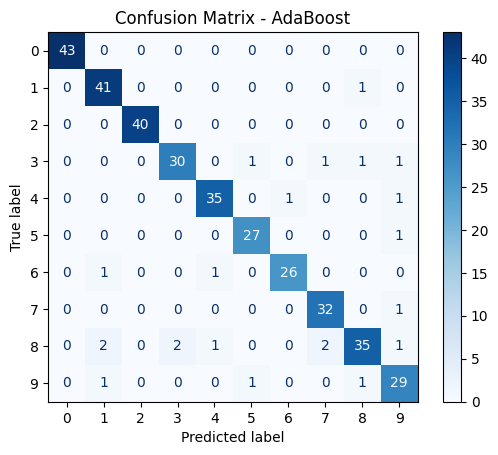

<Figure size 600x600 with 0 Axes>

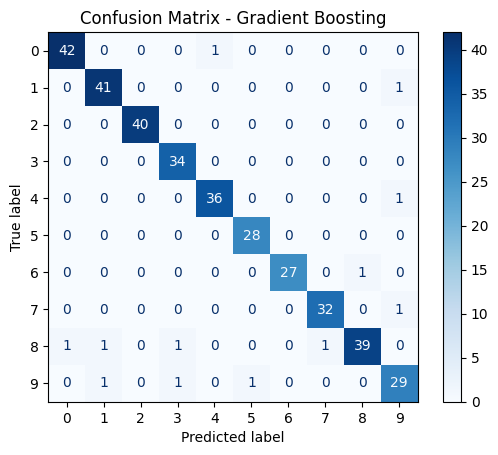

In [24]:
#Making predictions
yPredAda = adaBoostClf.predict(xTest)
yPredGbm = gbmClf.predict(xTest)

#Accuracy for classifiers AdaBoost Gradient Boosting
print(f"AdaBoost Accuracy: {accuracy_score(yTest, yPredAda):.4f}")
print(f"Gradient Boosting Accuracy: {accuracy_score(yTest, yPredGbm):.4f}")

#Classification Reports for AdaBoost and Gradient Boosting
print("Classification Report for AdaBoost:\n", classification_report(yTest, yPredAda))
print("Classification Report for Gradient Boosting:\n", classification_report(yTest, yPredGbm))

#Plot Confusion Matrix for AdaBoost
plt.figure(figsize=(6,6))
ConfusionMatrixDisplay.from_estimator(adaBoostClf, xTest, yTest, cmap="Blues")
plt.title("Confusion Matrix - AdaBoost")
plt.grid(False)
plt.show()

#Plot Confusion Matrix for Gradient Boosting
plt.figure(figsize=(6,6))
ConfusionMatrixDisplay.from_estimator(gbmClf, xTest, yTest, cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting")
plt.grid(False)
plt.show()

## Overfitting Check (Training vs Test Accuracy)

In [25]:
#Comparing the Training vs Test Accuracy
trainAccAda = accuracy_score(yTrain, adaBoostClf.predict(xTrain))
testAccAda = accuracy_score(yTest, yPredAda)

trainAccGbm = accuracy_score(yTrain, gbmClf.predict(xTrain))
testAccGbm = accuracy_score(yTest, yPredGbm)

print(f"AdaBoost Training Accuracy: {trainAccAda:.4f}, Test Accuracy: {testAccAda:.4f}")
print(f"Gradient Boosting Training Accuracy: {trainAccGbm:.4f}, Test Accuracy: {testAccGbm:.4f}")


AdaBoost Training Accuracy: 0.9986, Test Accuracy: 0.9389
Gradient Boosting Training Accuracy: 1.0000, Test Accuracy: 0.9667


## Plot ROC Curve

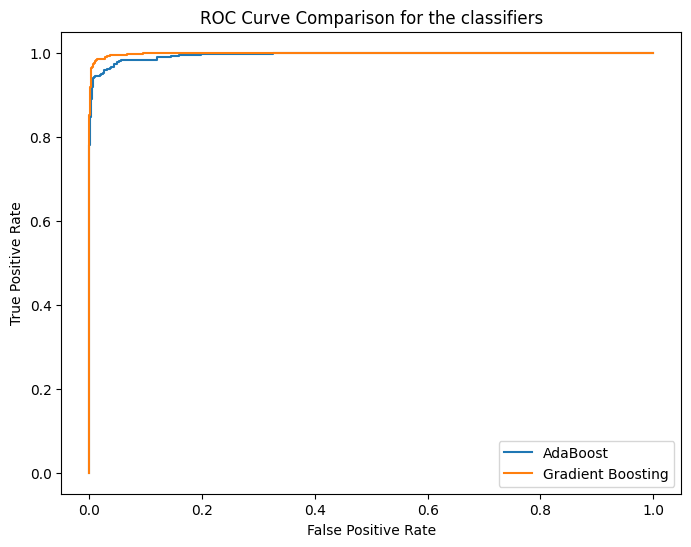

In [26]:
#Binarize the labels for multiclass ROC comparision
yTestBin = label_binarize(yTest, classes=np.unique(yTest))
adaProba = adaBoostClf.predict_proba(xTest)
gbmProba = gbmClf.predict_proba(xTest)

#Computing the ROC Curve
fprAda, tprAda, _ = roc_curve(yTestBin.ravel(), adaProba.ravel())
fprGbm, tprGbm, _ = roc_curve(yTestBin.ravel(), gbmProba.ravel())

#Plotting the ROC Curve for the classifiers
plt.figure(figsize=(8,6))
plt.plot(fprAda, tprAda, label="AdaBoost")
plt.plot(fprGbm, tprGbm, label="Gradient Boosting")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison for the classifiers")
plt.show()


# References

Scikit-Learn. (n.d.). sklearn.datasets.load_digits — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html [Accessed 25 February 2025].

Scikit-Learn. (n.d.). sklearn.model_selection.train_test_split — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html [Accessed 25 February 2025].

Scikit-Learn. (n.d.). sklearn.ensemble.AdaBoostClassifier — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html [Accessed 25 February 2025].

Scikit-Learn. (n.d.). sklearn.ensemble.GradientBoostingClassifier — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html [Accessed 25 February 2025].

Scikit-Learn. (n.d.). sklearn.tree.DecisionTreeClassifier — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html [Accessed 25 February 2025].

Scikit-Learn. (n.d.). sklearn.model_selection.GridSearchCV — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html [Accessed 25 February 2025].

Scikit-Learn. (n.d.). sklearn.metrics.accuracy_score — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html [Accessed 25 February 2025].

Scikit-Learn. (n.d.). sklearn.metrics.confusion_matrix — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html [Accessed 25 February 2025].

Scikit-learn developers (2024). Plot Confusion Matrix using ConfusionMatrixDisplay. scikit-learn: Machine Learning in Python. Available at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html [Accessed 25 Februrary 2025].

Scikit-Learn. (n.d.). sklearn.metrics.classification_report — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html [Accessed 25 February 2025].

Scikit-Learn. (n.d.). sklearn.metrics.roc_curve — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html [Accessed 25 February 2025].

Scikit-Learn. (n.d.). sklearn.metrics.auc — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html [Accessed 25 February 2025]

OpenAI. (2025). ChatGPT — Large Language Model Assistance for Coding. Available at: https://chat.openai.com [Accessed 25 February 2025].

To accomplish this assignment, I relied on the official Scikit-learn documentation to learn and implement key procedures like loading the dataset, training the model, hyperparameter tuning, evaluation metrics, and visualization techniques.
Additionally, I used ChatGPT to assist in the structuring of the hyperparameter tuning code and resolving minor coding issues with GridSearchCV, model evaluation logic, and consistent formatting. All external assistance was reviewed and understood before submission.
